<a href="https://colab.research.google.com/github/shahidulislamkhokon/Image-Processing-Multi-Label-Classification-Problem-/blob/main/Image_processing_(Multi_Label_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import all necessary library file**

In [ ]:
from tensorflow.keras.utils import*
from keras.preprocessing import image
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.models import Sequential, Model

from keras import regularizers, optimizers
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,MaxPooling2D,Dense,Flatten,BatchNormalization,Dropout,Input,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import seaborn as sns

%matplotlib inline


# **Unzip dataset in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Challenge-20201031.zip
!unzip /content/Challenge_test.zip
!unzip /content/Challenge_train.zip


Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/Challenge_test/test/._28-28841.jpg  
  inflating: Challenge_test/test/36-36563.jpg  
  inflating: __MACOSX/Challenge_test/test/._36-36563.jpg  
  inflating: Challenge_test/test/36-36211.jpg  
  inflating: __MACOSX/Challenge_test/test/._36-36211.jpg  
  inflating: Challenge_test/test/34-34531.jpg  
  inflating: __MACOSX/Challenge_test/test/._34-34531.jpg  
  inflating: Challenge_test/test/29-29686.jpg  
  inflating: __MACOSX/Challenge_test/test/._29-29686.jpg  
  inflating: Challenge_test/test/36-36588.jpg  
  inflating: __MACOSX/Challenge_test/test/._36-36588.jpg  
  inflating: Challenge_test/test/29-29645.jpg  
  inflating: __MACOSX/Challenge_test/test/._29-29645.jpg  
  inflating: Challenge_test/test/38-38592.jpg  
  inflating: __MACOSX/Challenge_test/test/._38-38592.jpg  
  inflating: Challenge_test/test/35-35076.jpg  
  inflating: __MACOSX/Challenge_test/test/._35-35076.jpg  
  inflating: Challenge_test/test/3

# **Train annotation file read**

In [ ]:
train = pd.read_csv('/content/Challenge_train/train.anno.txt',delim_whitespace=True)    # reading the csv file
train.head()

,27-27700.jpg,0,1,0.1,0.2,1.1,0.3,0.4,1.2,1.3,1.4,0.5,0.6,1.5,0.7,0.8,0.9,0.10
0,27-27704.jpg,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1,27-27705.jpg,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,27-27706.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27-27709.jpg,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
4,27-27712.jpg,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0


# **# Labels name add in train annotation file**


In [ ]:
train.columns=['file_name', 'indoor', 'outdoor', 'person', 'day', 'night', 'water',
       'road', 'vegetation', 'tree', 'mountains', 'beach', 'buildings', 'sky', 'sunny', 'partly_cloudy', 'overcast', 'animal']
train.columns

Index(['file_name', 'indoor', 'outdoor', 'person', 'day', 'night', 'water',
       'road', 'vegetation', 'tree', 'mountains', 'beach', 'buildings', 'sky',
       'sunny', 'partly_cloudy', 'overcast', 'animal'],
      dtype='object')

In [ ]:
train.head()

,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,27-27704.jpg,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
1,27-27705.jpg,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0
2,27-27706.jpg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27-27709.jpg,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
4,27-27712.jpg,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0


# **Overview of all train data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


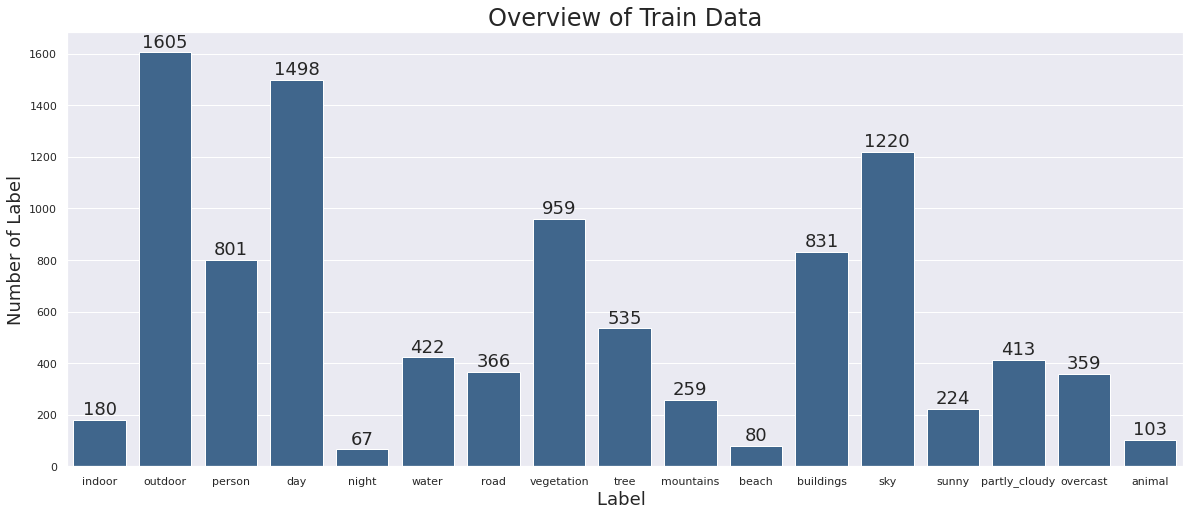

In [ ]:
categories = list(train.columns[1:].values)
sns.set(font_scale = 1)
sns.color="Blue"
plt.figure(figsize=(20,8))
ax= sns.barplot(categories, train.iloc[1:,1:].sum().values,color=(0.2,0.4,0.6,0.6))
plt.title("Overview of Train Data", fontsize=24)
plt.ylabel('Number of Label', fontsize=18)
plt.xlabel('Label ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = train.iloc[1:,1:].sum().values
for rect, label in zip(rects, labels):
    height2 = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height2 + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

# **Apply Image width, height**

In [ ]:
width=200
height=200
#train.shape[1]

# **All train Image load into np array**

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/Challenge_train/train/'+train['file_name'][i],target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X_train = np.array(train_image)

100%|██████████| 1826/1826 [00:08<00:00, 220.89it/s]


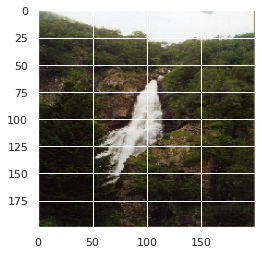

In [ ]:
plt.imshow(X_train[1001])  #A numpy array is a grid of values

In [ ]:
X_train.shape


(1826, 200, 200, 3)

# **Test Data annontation file read**

In [ ]:
test = pd.read_csv('/content/Challenge_test/test.anno.txt',delim_whitespace=True)    # reading the csv file
test.head()

,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,27-27707.jpg,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
1,27-27708.jpg,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,27-27711.jpg,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,0
3,27-27713.jpg,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,27-27715.jpg,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0


# **Overview of test data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


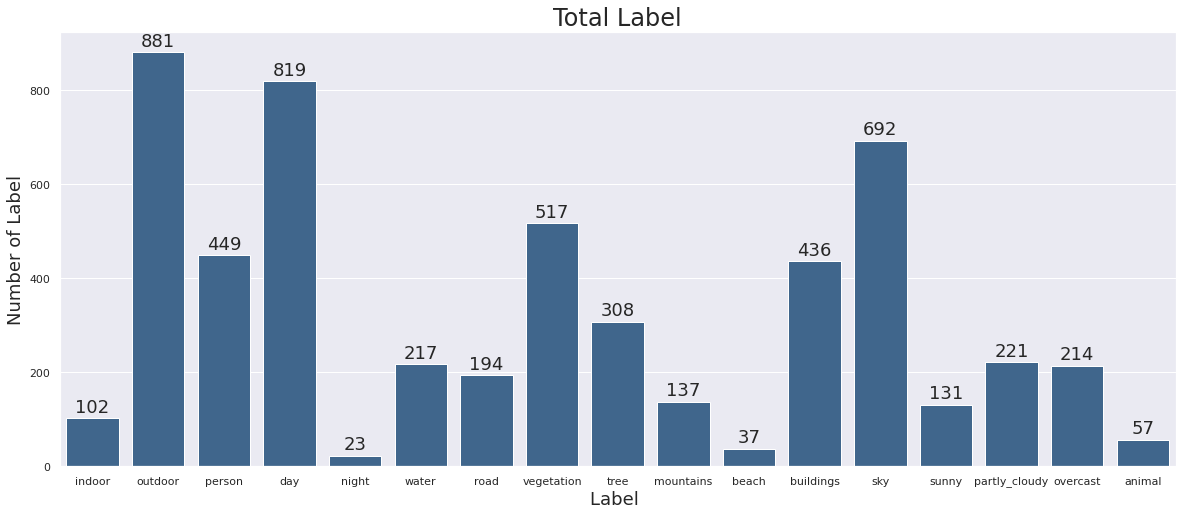

In [ ]:
categories = list(test.columns[1:].values)
categories
sns.set(font_scale = 1)
plt.figure(figsize=(20,8))
ax= sns.barplot(categories, test.iloc[1:,1:].sum().values,color=(0.2,0.4,0.6,0.6))
plt.title("Total Label", fontsize=24)
plt.ylabel('Number of Label', fontsize=18)
plt.xlabel('Label ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = test.iloc[1:,1:].sum().values
for rect, label in zip(rects, labels):
    height1 = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height1 + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

# **Insert all test image into np array**

In [ ]:
test_image = []
for i in range(test.shape[0]):
    img = image.load_img('/content/Challenge_test/test/'+test['file_name'][i],target_size=(width,height,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Y_test = np.array(test_image)

In [ ]:
Y_test.shape

(1000, 200, 200, 3)

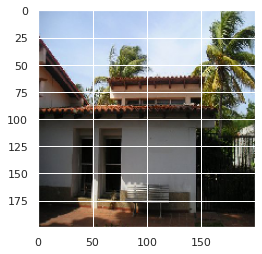

In [ ]:
plt.imshow(Y_test[100])

In [ ]:
train['indoor'][137]

1

# **Drop unexpected column from Dataset**

In [ ]:
y_train = np.array(train.drop(['file_name'],axis=1))
y_train

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [ ]:
y_test = np.array(test.drop(['file_name'],axis=1))
y_test



array([[0, 0, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]])

In [ ]:
train.columns[1:]

Index(['indoor', 'outdoor', 'person', 'day', 'night', 'water', 'road',
       'vegetation', 'tree', 'mountains', 'beach', 'buildings', 'sky', 'sunny',
       'partly_cloudy', 'overcast', 'animal'],
      dtype='object')

In [ ]:
X_train[4].shape

(200, 200, 3)

# **CNN Model**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(width,height,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='sigmoid'))  #Depends on number of classes

#model.compile(tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 200, 200, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 198, 198, 32)      9248      
                                                                 
 activation_16 (Activation)  (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 99, 99, 32)        0         
                                                      

# **Compile the model**

In [ ]:
#model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.compile(tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


# **Train the model**

In [ ]:
history = model.fit(X_train,y_train,epochs=5,validation_data=(Y_test,y_test))

Epoch 1/5
58/58 [==============================] - 34s 381ms/step - loss: 0.5341 - accuracy: 0.4666 - val_loss: 0.4911 - val_accuracy: 0.2880
Epoch 2/5
58/58 [==============================] - 21s 360ms/step - loss: 0.4369 - accuracy: 0.4775 - val_loss: 0.4805 - val_accuracy: 0.2790
Epoch 3/5
58/58 [==============================] - 21s 357ms/step - loss: 0.4187 - accuracy: 0.4693 - val_loss: 0.4639 - val_accuracy: 0.5430
Epoch 4/5
58/58 [==============================] - 21s 358ms/step - loss: 0.4010 - accuracy: 0.4814 - val_loss: 0.4471 - val_accuracy: 0.3350
Epoch 5/5
58/58 [==============================] - 21s 363ms/step - loss: 0.3890 - accuracy: 0.4545 - val_loss: 0.4215 - val_accuracy: 0.6260


## **Insert all test image into a data generator**

In [ ]:
print('For Testing:')
from keras_preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)  #to transform every pixel value from range [0,255] -> [0,1]


test_generator=test_datagen.flow_from_dataframe(
    dataframe=test,
    directory="/content/Challenge_test/test",
    x_col="file_name",
    batch_size=1,
    seed=42,
    shuffle=False,
    class_mode=None,
    target_size=(height,width
    ))

For Testing:
Found 1000 validated image filenames.


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
predicted_data = model.predict_generator(test_generator,
                             steps=STEP_SIZE_TEST,
                             #steps = 100,
                             verbose=1)
print(predicted_data)

  10/1000 [..............................] - ETA: 12s

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1000/1000 [==============================] - 9s 9ms/step
[[0.10571361 0.8753975  0.49398267 ... 0.06121317 0.2606218  0.09878346]
 [0.04881779 0.93208617 0.2263521  ... 0.07431054 0.4401102  0.08262965]
 [0.03777692 0.9662267  0.22768803 ... 0.14771006 0.53803974 0.04951341]
 ...
 [0.1573323  0.87627757 0.6763433  ... 0.05035588 0.07779637 0.03019348]
 [0.04988177 0.9572753  0.15206006 ... 0.36018744 0.43740436 0.0353993 ]
 [0.1935266  0.89021724 0.5144689  ... 0.20956905 0.3164351  0.09397181]]


# **New validation data evaluated file and save into drive**

In [ ]:
pred_bool = (predicted_data > 0.5)

predictions = pred_bool.astype(int)
testing_columns = test.columns[1:]

#columns should be the same order of y_col
results = pd.DataFrame(predictions, columns = testing_columns)
results["file_name"] = test_generator.filenames

ordered_cols = test.columns
results = results[ordered_cols]#To get the same column order
print('Predicted Results (for ones only)---------------')
display(results)
results.to_csv('/content/Challenge_test/test.eval_1.txt', sep=" ",index=False)

Predicted Results (for ones only)---------------


,file_name,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,27-27707.jpg,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,27-27708.jpg,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
2,27-27711.jpg,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,27-27713.jpg,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
4,27-27715.jpg,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,38-38583.jpg,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
996,38-38590.jpg,0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0
997,38-38592.jpg,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,38-38593.jpg,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


# **Make Prediction for a specefic image**

[[0.03777692 0.9662267  0.22768803 0.92502064 0.00929672 0.37137225
  0.07079788 0.46103215 0.12783927 0.35352078 0.02461291 0.49760494
  0.9083513  0.00989892 0.14771006 0.5380397  0.04951342]]


,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


outdoor (0.966)
day (0.925)
sky (0.908)
overcast (0.538)
buildings (0.498)
vegetation (0.461)
water (0.371)
mountains (0.354)
person (0.228)
partly_cloudy (0.148)
tree (0.128)
road (0.0708)
animal (0.0495)
indoor (0.0378)
beach (0.0246)
sunny (0.0099)
night (0.0093)


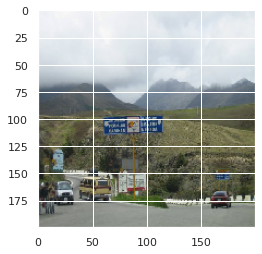

In [ ]:
img = image.load_img('/content/Challenge_test/test/27-27711.jpg',target_size=(width,height,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[1:])
proba = model.predict(img.reshape(1,width,height,3))
print(proba)
pred_bool = (proba > 0.5)

predictions = pred_bool.astype(int)
#columns should be the same order of y_col
results = pd.DataFrame(predictions, columns=train.columns[1:])
display(results)

# predict the top n labels on validation dataset
top_3 = np.argsort(proba[0])[:-18:-1]
for i in range(17):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

[[0.04571257 0.8892338  0.17252648 0.7655247  0.03330017 0.26597723
  0.20115842 0.5309592  0.24023582 0.07380491 0.0284841  0.70777935
  0.7918618  0.12424949 0.29065377 0.13300605 0.02826167]]


,indoor,outdoor,person,day,night,water,road,vegetation,tree,mountains,beach,buildings,sky,sunny,partly_cloudy,overcast,animal
0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


outdoor (0.889)
sky (0.792)
day (0.766)
buildings (0.708)
vegetation (0.531)
partly_cloudy (0.291)
water (0.266)
tree (0.24)
road (0.201)
person (0.173)
overcast (0.133)
sunny (0.124)
mountains (0.0738)
indoor (0.0457)
night (0.0333)
beach (0.0285)
animal (0.0283)


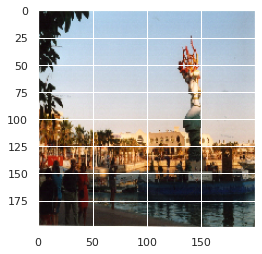

In [ ]:
img = image.load_img('/content/Challenge_test/test/38-38583.jpg',target_size=(width,height,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[1:])
proba = model.predict(img.reshape(1,width,height,3))
print(proba)
pred_bool = (proba > 0.5)

predictions = pred_bool.astype(int)
#columns should be the same order of y_col
results = pd.DataFrame(predictions, columns=train.columns[1:])
display(results)


top_3 = np.argsort(proba[0])[:-18:-1]
for i in range(17):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

# **Performance Meterics**

In [ ]:
import pandas
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Load ground truth and predicted test labels
# Name the document with predicted labels as: 'test.eval.txt'
y_true = pandas.read_csv('/content/Challenge_test/test.anno.txt',delimiter=' ')
y_pred = pandas.read_csv('/content/Challenge_test/test.eval_1.txt',delimiter=' ')

# Remove the first column (file name)
y_true = y_true.drop('file_name', axis=1)
y_pred = y_pred.drop('file_name', axis=1)

# Calculate precision, recall, and f1 score
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

# Create the list of all classes
classes = list(y_true.columns)

# Prepare for printing
dash = '-' * 45
# Loop over classes
for i in range(len(classes)+1):
    # Print the header
    if i == 0:
      print(dash)
      print('{:<15}{:<12}{:<9}{:<4}'.format('Class','precision','recall','f1 score'))
      print(dash)
    # Print precision, recall and f1 score for each of the labels   
    else:
      print('{:<17}{:<11.2f}{:<10.2f}{:<10.2f}'.format(classes[i-1],precision[i-1],recall[i-1],f1[i-1]))

# Print average precision     
precision_micro = precision_score(y_true, y_pred, average='micro')
print('{:<20}{:<4.2f}'.format('\nAverage precision:',precision_micro))
# Print average recall    
recall_micro = recall_score(y_true, y_pred, average='micro')
print('{:<19}{:<4.2f}'.format('Average recall:',recall_micro)) 
# Print average f1 score     
f1_micro = f1_score(y_true, y_pred, average='micro')
print('{:<19}{:<12.2f}'.format('Average f1 score:',f1_micro))





---------------------------------------------
Class          precision   recall   f1 score
---------------------------------------------
indoor           0.60       0.28      0.39      
outdoor          0.90       0.98      0.94      
person           0.71       0.52      0.60      
day              0.89       0.92      0.90      
night            0.50       0.35      0.41      
water            0.49       0.18      0.26      
road             0.00       0.00      0.00      
vegetation       0.77       0.50      0.61      
tree             0.58       0.13      0.21      
mountains        1.00       0.01      0.01      
beach            0.00       0.00      0.00      
buildings        0.70       0.56      0.62      
sky              0.92       0.86      0.89      
sunny            0.67       0.28      0.40      
partly_cloudy    0.44       0.02      0.03      
overcast         0.70       0.35      0.47      
animal           0.00       0.00      0.00      

Average precision: 0.83
Avera

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
